In [1]:
# install libraries
#import os
#os.environ["PATH"] = "/srv/conda/lib" + os.pathsep + os.environ["PATH"]
#print(os.environ["PATH"])


#not all libraries can be installed so easily. Often graphics libraries (graphs) have to do some 
# clever stuff to talk to the graphics card.
# unfortunately, those libraries have to be isntalled in a slightly different way...
# from home ,choose New -> Terminal
# enter the following (copy paste), and press enter
# conda install -c anaconda graphviz --yes
# repeat for:
# conda install -c anaconda pydotplus --yes
!conda install -c anaconda graphviz --yes

#necessary installs
!pip install pandas 
!pip install sklearn
!pip install matplotlib
!pip install seaborn
!pip install graphviz
!pip install pydotplus


Solving environment: done

## Package Plan ##

  environment location: /srv/conda

  added / updated specs: 
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    libxml2-2.9.8              |       h26e45fe_1         2.0 MB  anaconda
    freetype-2.9.1             |       h8a8886c_0         821 KB  anaconda
    graphite2-1.3.11           |       h16798f4_2         129 KB  anaconda
    ca-certificates-2018.03.07 |                0         124 KB  anaconda
    harfbuzz-1.8.4             |       hec2c2bc_0         812 KB  anaconda
    jpeg-9b                    |       h024ee3a_2         248 KB  anaconda
    fontconfig-2.13.0          |       h9420a91_0         291 KB  anaconda
    certifi-2018.8.24          |           py36_1         140 KB  anaconda
    openssl-1.0.2p             |       h14c3975_0         3.5 MB  anaconda
    libuuid-1.0.3              |       h1bed415_2      

In [2]:
#import libraries
# 🐼 is to work with tables of data (http://pandas.pydata.org/)
import pandas as pd

# sklearn is for machine learning (http://scikit-learn.org)
from sklearn import tree

# matplotlib is to make plots, pandas using it under the hood
# Display plots in this page rather than open another page
%matplotlib inline

import seaborn as sns

import graphviz 
import pydotplus #library for drawing dots on graph efficiently

from sklearn.model_selection import cross_val_score, GridSearchCV #libraries for imporving learning

from IPython.display import Image #create image files

In [3]:
# load the data
df = pd.read_csv('mushrooms.csv')

In [4]:
#explore data
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
#describe the data
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
#Let's try and visualise this data with the help of https://www.kaggle.com/surajit346/ml-models-and-visualizations-for-beginners


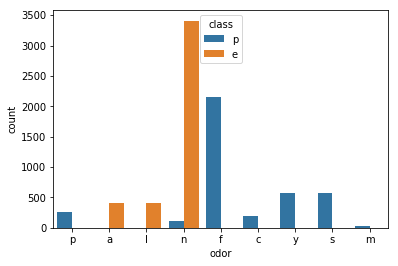

In [7]:
sns.countplot(x='odor',hue='class',data=df)


In [8]:
#one hot encoding the data
features = pd.get_dummies(df)
features.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [9]:
#we are interested whether its edible or poisonous, so we don't want to use that information as part of our model
#if we did, we would be able to use the fact a mushroom is edible or poisonous to tell us if its either...
#that would be cheating. So we remove these features.
#we will store these properties (the result its predicting in classes. So now we have features and classes)
features = features.drop(['class_e','class_p'],axis=1)
classes = df['class']

In [10]:
#so now we use a decision tree on the features to predict the classes
model = tree.DecisionTreeClassifier()
model.fit(features,classes)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

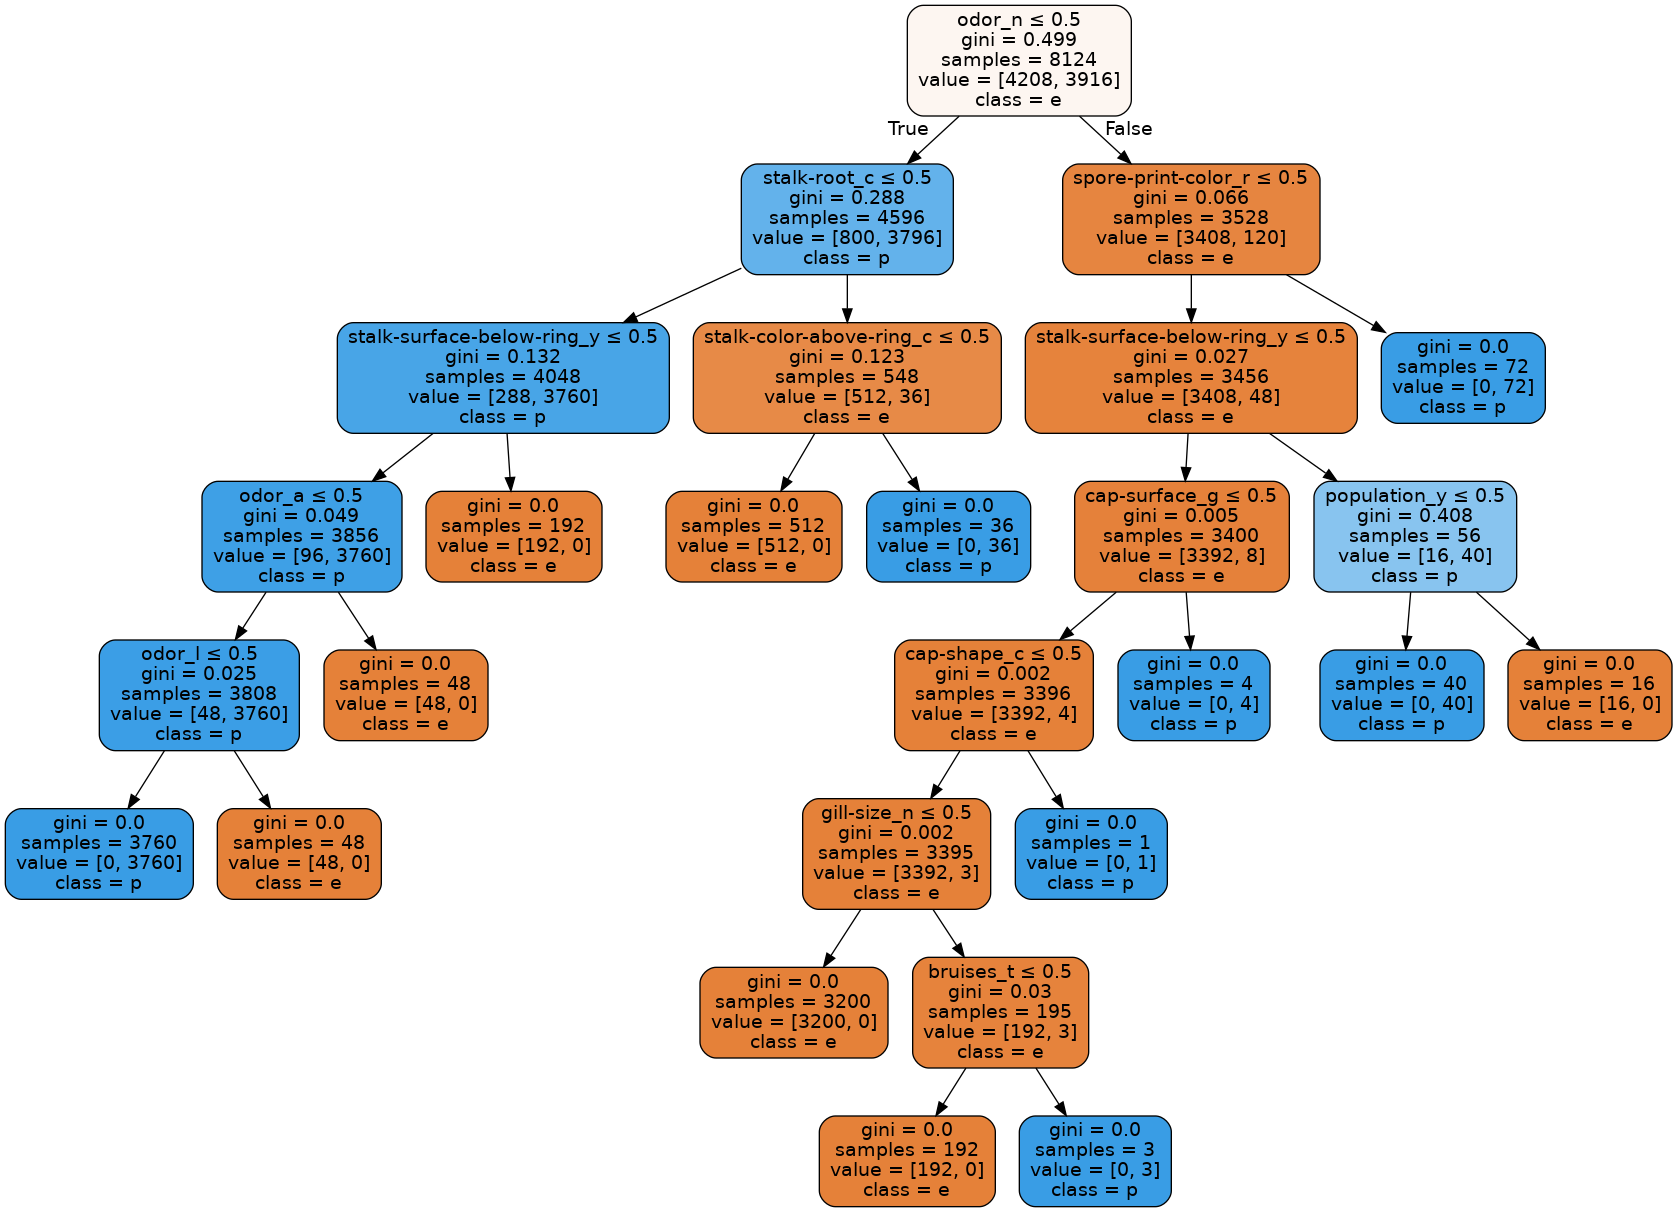

In [11]:
#option 1
#using sklearn's documentation we have written a function for you to plot the tree
#from here: # http://scikit-learn.org/stable/modules/tree.html#classification
def plotTree():
    dot_data = tree.export_graphviz(model, 
                                    out_file=None, 
                                    feature_names=features.columns,
                                    filled=True, 
                                    rounded=True,  
                                    class_names=model.classes_,
                                    special_characters=True)
    #graph = graphviz.Source(dot_data)
    graph = pydotplus.graph_from_dot_data(dot_data)
    return graph.create_png()

# make sure to have installed the libraries via anaconda
# conda install -c anaconda graphviz --yes

#lets plot the tree
img = plotTree()
Image(img)

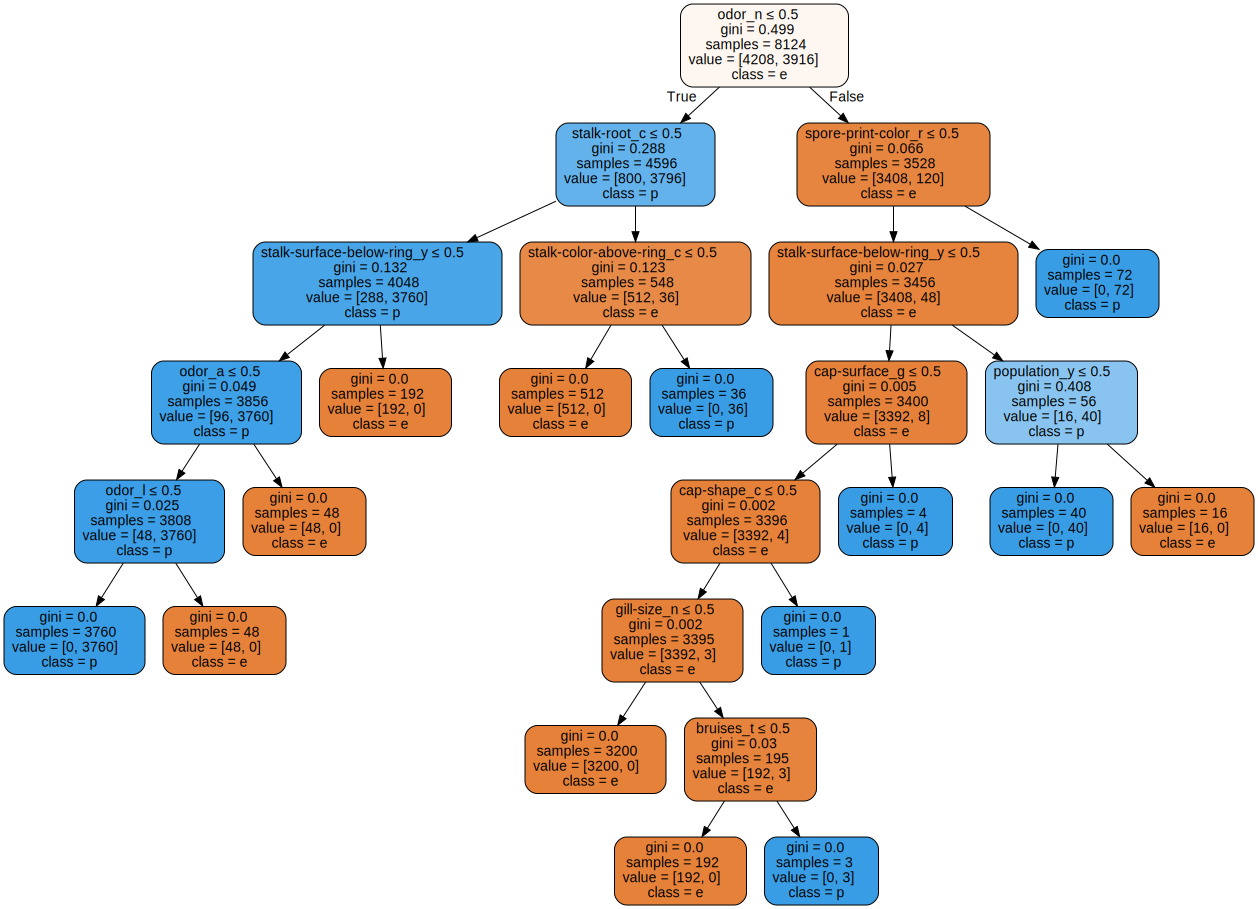

In [12]:
#option 2 (don't use both!)

#http://scikit-learn.org/stable/modules/tree.html#classification
def plotTree():
    dot_data = tree.export_graphviz(model, 
                                    out_file=None, 
                                    feature_names=features.columns,
                                    filled=True, 
                                    rounded=True,  
                                    class_names=model.classes_,
                                    special_characters=True)
    graph = graphviz.Source(dot_data)
    return graph
#use this method to plot the tree
plotTree()

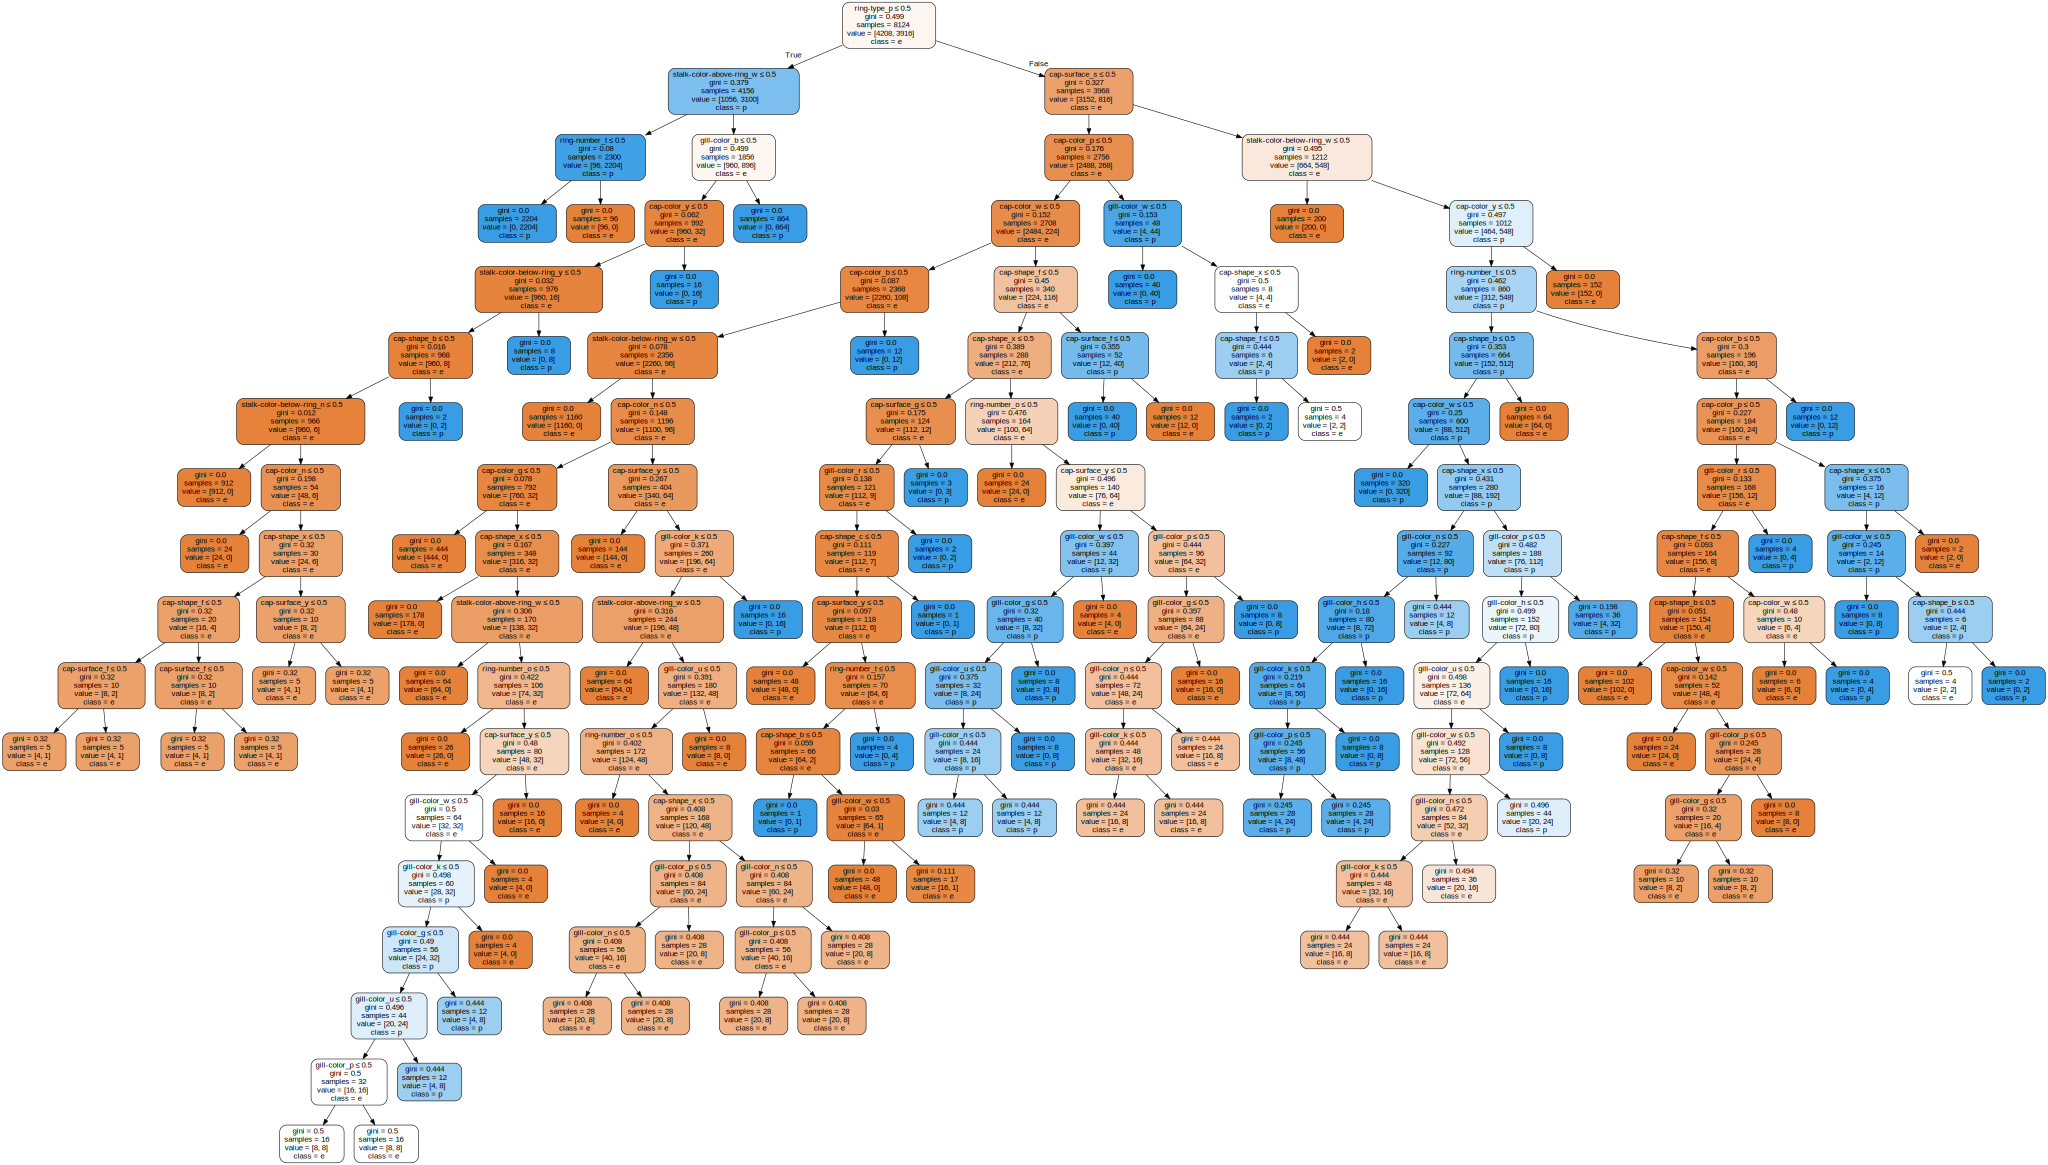

In [20]:
#first things first, its splitting on odour! from a picture we cant tell odour, so we have to remove it. 
# And infact there are a load of things we can't tell from a picture:
features = pd.get_dummies(df.drop(['class','odor','gill-attachment',
                                  'gill-spacing','stalk-shape','stalk-root','stalk-surface-above-ring',
                                 'stalk-surface-below-ring','population','gill-size','habitat','bruises','spore-print-color'],axis=1))
model = tree.DecisionTreeClassifier()
model.fit(features,classes)
#be careful if you chose option 1 or 2 above
plotTree()

In [14]:
#right, its now having to ask ALOT of questions to get anything its satisfied with. This isn't easy to read.
# Lets see how good it is... (remember 0 is bad)
model.score(features,classes)

0.9769817823732152

In [15]:
#overfitting...
#lets cross validate
# http://scikit-learn.org/stable/modules/cross_validation.html
train_test = cross_val_score(model, features, classes)
print(train_test)

[0.85788114 0.96565731 0.74141116]


/srv/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [16]:
train_test.mean() #get the average score of all the tests...

0.8549832016271924

In [17]:
parameters = {'max_depth':range(2,20)}

modelSearch = GridSearchCV(tree.DecisionTreeClassifier(), parameters)#, n_jobs=4

modelSearch.fit(features, classes)

depth = modelSearch.best_params_["max_depth"]
#tree_model = modelSearch.best_estimator_

model = tree.DecisionTreeClassifier(max_depth=depth)
model.fit(features,classes)
model.score(features,classes)

/srv/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.9108813392417529

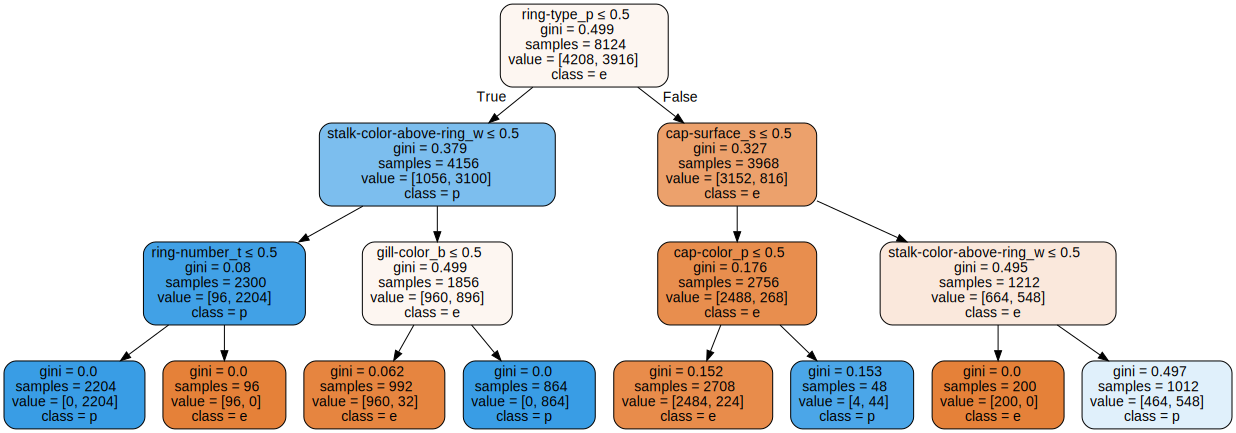

In [19]:
plotTree()